In [11]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy import stats

# Reading CSV file with indexing, avoiding duplication by not specifying 'index_col=0'
data = pd.read_csv('./medical_raw_data.csv', index_col=0)

# Inspecting data types, count of values, and overall dataframe size
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            7412 non-null   float64
 15  Age                 7586 non-null   float64
 16  Education

In [12]:
# inspect dataframe to spot problems
pd.set_option("display.max_columns", None)
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",NaN,25.0,Bachelor's Degree,Student,45967.61,Widowed,Male,No,16.481612,4,2,1,No,Emergency Admission,Yes,No,Medium,NaN,No,No,No,No,1.0,No,Yes,No,Intravenous,51.561217,6651.241294,8927.642189,3,2,2,3,4,3,4,2
9997,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4.0,87.0,Regular High School Diploma,Full Time,14983.02,Widowed,Male,Yes,18.451601,5,0,0,No,Elective Admission,Yes,No,Medium,1.0,Yes,Yes,No,No,0.0,No,No,Yes,CT Scan,68.668237,7851.522660,28507.147340,3,3,4,2,5,3,4,4
9998,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3.0,NaN,Regular High School Diploma,Full Time,65917.81,Separated,Female,Yes,15.752751,4,2,0,Yes,Elective Admission,Yes,No,High,1.0,No,No,No,No,1.0,Yes,No,No,Intravenous,NaN,7725.953391,15281.214660,3,3,3,4,4,2,3,2
9999,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491e

In [13]:
## Verify the CaseOrder is unique (10,000 results)
df.CaseOrder.value_counts().count()

10000

In [14]:
## Verify the Customer variable is unique (10,000 results)

df.Customer_id.value_counts().count()


10000

In [15]:
# Verify Interaction is unique (10,000 results)
df.Interaction.value_counts().count()

10000

In [16]:
# Verify UID is unique (10,000 results)
df.UID.value_counts().count()


10000

In [17]:
# Make sure values are placed into categorical values
df.Area.value_counts()

Area
Rural       3369
Suburban    3328
Urban       3303
Name: count, dtype: int64

In [18]:
# Check full range of values,check categorical
df.Timezone.value_counts()

Timezone
America/New_York                  3889
America/Chicago                   3771
America/Los_Angeles                937
America/Denver                     612
America/Detroit                    262
America/Indiana/Indianapolis       151
America/Phoenix                    100
America/Boise                       86
America/Anchorage                   50
America/Puerto_Rico                 43
Pacific/Honolulu                    34
America/Menominee                   14
America/Nome                        12
America/Indiana/Vincennes            8
America/Kentucky/Louisville          6
America/Sitka                        6
America/Toronto                      5
America/Indiana/Marengo              3
America/Indiana/Tell_City            3
America/North_Dakota/Beulah          2
America/Yakutat                      1
America/Indiana/Winamac              1
America/Indiana/Knox                 1
America/North_Dakota/New_Salem       1
America/Indiana/Vevay                1
America/Adak    

In [19]:
# Verify data is within bounds, determine if applicable for datatype Int64
df.Children.describe()

count    7412.000000
mean        2.098219
std         2.155427
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64

In [20]:
# Verify data is within bounds, determine if applicable for Int64
df.Age.describe()

count    7586.000000
mean       53.295676
std        20.659182
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

In [21]:
df.Education.value_counts()

Education
Regular High School Diploma                 2444
Bachelor's Degree                           1724
Some College, 1 or More Years, No Degree    1484
9th Grade to 12th Grade, No Diploma          832
Associate's Degree                           797
Master's Degree                              701
Some College, Less than 1 Year               642
Nursery School to 8th Grade                  552
GED or Alternative Credential                389
Professional School Degree                   208
No Schooling Completed                       133
Doctorate Degree                              94
Name: count, dtype: int64

In [22]:
# Make sure values are suitable to be categorical
df.Employment.value_counts()

Employment
Full Time     6029
Student       1017
Part Time      991
Unemployed     983
Retired        980
Name: count, dtype: int64

In [23]:
# Verify data is around reasonable bounds
df.Income.describe()

count      7536.000000
mean      40484.438268
std       28664.861050
min         154.080000
25%       19450.792500
50%       33942.280000
75%       54075.235000
max      207249.130000
Name: Income, dtype: float64

In [24]:
# Those min and max values seem somewhat off, I will look at smallest values
df.Income.nsmallest(n=20)

822      154.08
9809     300.79
288      395.23
111      401.86
8659     493.04
9129     695.22
5894     702.16
1216     826.01
6300     881.07
1035     881.40
3457     953.74
6107    1048.43
3259    1078.12
5       1209.56
9088    1277.08
9029    1366.98
337     1380.70
1032    1402.22
2331    1409.92
9431    1453.90
Name: Income, dtype: float64

In [25]:
# ...and the largest values
df.Income.nlargest(n=20)

8387    207249.13
842     204542.41
8599    203774.65
6407    197675.05
1779    197576.18
7493    196915.63
4332    194796.24
7245    190110.76
4408    189416.27
3074    189129.92
8530    186752.05
9588    179543.68
7405    178945.35
174     178470.63
6695    171680.20
623     171288.05
9480    171031.21
7051    170961.47
1109    167286.62
31      167105.10
Name: Income, dtype: float64

In [26]:
# Make sure values are applicable to be placed categorical
df.Marital.value_counts()

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

In [27]:
df.Gender.value_counts()

Gender
Female                  5018
Male                    4768
Prefer not to answer     214
Name: count, dtype: int64

In [28]:
# Make sure REAdmis.values are applicable to be placed boolean
df.ReAdmis.value_counts()

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

In [29]:
# Verify data is in reasonable bounds
df.VitD_levels.describe()

count    10000.000000
mean        19.412675
std          6.723277
min          9.519012
25%         16.513171
50%         18.080560
75%         19.789740
max         53.019124
Name: VitD_levels, dtype: float64

In [30]:
#We might want to reassess the upper limit for VitD_levels, as it appears quite high. 
#Let's examine the top 20 entries in this column to determine if a value like 53 is within the expected range, considering my limited expertise on the subject.
df.VitD_levels.nlargest(n=20)

1964    53.019124
1307    52.757599
7158    52.370764
7231    52.271584
2616    52.156112
3474    52.124137
7528    52.117337
581     52.063590
1799    51.671571
8682    51.659892
448     51.430034
2747    51.305309
6939    51.216965
9908    51.202138
5044    51.030046
7761    50.958467
8358    50.927637
2157    50.915519
3387    50.888076
5596    50.884049
Name: VitD_levels, dtype: float64

In [31]:
# Verify Doc_visits.data is in reasonable bounds
df.Doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [32]:
# Verify Full_meals.data is in reasonable bounds
df.Full_meals_eaten.describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

In [33]:
# Verify VitD_supp.data is in reasonable bounds
df.VitD_supp.describe()

count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: VitD_supp, dtype: float64

In [34]:

# Make sure Soft_drink.values are appropriate to be placed into boolean
df.Soft_drink.value_counts()

Soft_drink
No     5589
Yes    1944
Name: count, dtype: int64

In [35]:

# Make sure values are appropriate to be placed into categorical
df.Initial_admin.value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [36]:
# Make sure values are appropriate to be placed into boolean
df.HighBlood.value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [37]:
# Make sure values are appropriate to be placed into boolean
df.Stroke.value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [38]:
# Make sure complication_risk.values are appropriate to be placed into categorical
df.Complication_risk.value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [39]:

# Verify Overweight.value exists to be translated into datatype boolean
df.Overweight.value_counts()

Overweight
1.0    6395
0.0    2623
Name: count, dtype: int64

In [40]:
# Make sure Arthritis.values are suitable to be placed into datatype boolean
df.Arthritis.value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [41]:

# Make sure Diabetes.values are suitable to be placed into boolean
df.Diabetes.value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [42]:
# Make sure Hyperlipidemia.values are applicable to be placed into boolean
df.Hyperlipidemia.value_counts()

Hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64

In [43]:
# Make sure BackPain.values are applicable to be placed into boolean
df.BackPain.value_counts()

BackPain
No     5886
Yes    4114
Name: count, dtype: int64

In [44]:
# Verify Anxiety.value exists to be translated into boolean
df.Anxiety.value_counts()


Anxiety
0.0    6110
1.0    2906
Name: count, dtype: int64

In [45]:
# Make sure Allergic_rhinitis.values are applicable to into boolean
df.Allergic_rhinitis.value_counts()

Allergic_rhinitis
No     6059
Yes    3941
Name: count, dtype: int64

In [47]:
# Make sure Asthma.values are applicable to into boolean
df.Asthma.value_counts()

Asthma
No     7107
Yes    2893
Name: count, dtype: int64

In [48]:

# Make sure Services.values are applicable to be categories
df.Services.value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

In [49]:
# Examine data format
df.Initial_days.value_counts()

Initial_days
10.585770    1
64.630142    1
48.772686    1
67.036508    1
63.334689    1
            ..
9.216747     1
1.021594     1
10.261690    1
17.170461    1
70.850592    1
Name: count, Length: 8944, dtype: int64

In [50]:
# Verify Initial_days.describe data exists within bounds, and is able to be rounded
df.Initial_days.describe()

count    8944.000000
mean       34.432082
std        26.287050
min         1.001981
25%         7.911709
50%        34.446941
75%        61.124654
max        71.981486
Name: Initial_days, dtype: float64

In [52]:
# Verify TotalCharge.data exists within reasonable bounds, is Able to be rounded
df.TotalCharge.describe()

count    10000.000000
mean      5891.538261
std       3377.558136
min       1256.751699
25%       3253.239465
50%       5852.250564
75%       7614.989701
max      21524.224210
Name: TotalCharge, dtype: float64

In [53]:
# Verify Additional_charges.data exists within reasonable bounds, is able to be rounded
df.Additional_charges.describe()

count    10000.000000
mean     12934.528586
std       6542.601544
min       3125.702716
25%       7986.487642
50%      11573.979365
75%      15626.491033
max      30566.073130
Name: Additional_charges, dtype: float64

In [54]:
# Verify data exists within 1 - 8 limit; and is able to be stored as ordered categorical
df.Item1.value_counts()

Item1
4    3455
3    3404
5    1377
2    1315
6     225
1     213
7      10
8       1
Name: count, dtype: int64

In [55]:
# Verify data exists within 1 - 8 limit; and is able to be stored as ordered categorical
df.Item2.value_counts()


Item2
3    3439
4    3351
5    1421
2    1360
1     213
6     204
7      12
Name: count, dtype: int64

In [56]:
# Verify data exists within 1 - 8 limit; and is able to be stored as ordered categorical
df.Item3.value_counts()

Item3
4    3464
3    3379
5    1358
2    1356
6     220
1     211
7      11
8       1
Name: count, dtype: int64

In [57]:
# Verify data exists within 1 - 8 limit; and is able to be stored as ordered categorical
df.Item4.value_counts()

Item4
3    3422
4    3394
5    1388
2    1346
6     231
1     207
7      12
Name: count, dtype: int64

In [58]:
# Verify data exists within 1 - 8 constraint and is suitable to be stored as datatype ordered categorical
df.Item5.value_counts()

Item5
4    3446
3    3423
2    1380
5    1308
6     219
1     211
7      13
Name: count, dtype: int64

In [59]:
# Verify data exists within 1 - 8 limit; and is able to be stored as ordered categorical
df.Item6.value_counts()

Item6
4    3464
3    3371
5    1403
2    1319
6     220
1     213
7      10
Name: count, dtype: int64

In [60]:
# Verify data exists within 1 - 8 limit; and is able to be stored as ordered categorical
df.Item7.value_counts()


Item7
4    3487
3    3456
2    1345
5    1274
1     215
6     212
7      11
Name: count, dtype: int64

In [61]:
# Verify data exists within 1 - 8 limit; and is able to be stored as ordered categorical
df.Item8.value_counts()

Item8
3    3401
4    3337
5    1429
2    1391
6     221
1     209
7      12
Name: count, dtype: int64

In [63]:
# Transform the 'Zip' column to strings from integers and prepend zeros to achieve a length of 5 characters
df['Zip'] = df['Zip'].astype("str").str.zfill(5)
# Modify the data type of the 'Area' column from string to category
df["Area"] = df["Area"].astype("category")
# Substituting city-specific values with time-zone specific values
df.Timezone.replace({
    # Puerto Rico observes Atlantic Standard Time throughout the year without DST
    "America/Puerto_Rico" : "US - Puerto Rico",
    # US - Eastern time zone observes DST
    "America/New_York": "US - Eastern",
    "America/Detroit" : "US - Eastern",
    "America/Indiana/Indianapolis" : "US - Eastern",
    "America/Indiana/Vevay" : "US - Eastern",
    "America/Indiana/Vincennes" : "US - Eastern",
    "America/Kentucky/Louisville" : "US - Eastern",
    "America/Toronto" : "US - Eastern",
    "America/Indiana/Marengo" : "US - Eastern",
    "America/Indiana/Winamac" : "US - Eastern",
    # US - Central time zone observes DST
    "America/Chicago" : "US - Central",
    "America/Menominee" : "US - Central",
    "America/Indiana/Knox" : "US - Central",
    "America/Indiana/Tell_City" : "US - Central",
    "America/North_Dakota/Beulah" : "US - Central",
    "America/North_Dakota/New_Salem" : "US - Central",
    # US - Mountain time zone observes DST
    "America/Denver" : "US - Mountain",
    "America/Boise" : "US - Mountain",
    # Arizona remains on Mountain Standard Time throughout the year without DST
    "America/Phoenix" : "US - Arizona",
    # US - Pacific time zone observes DST
    "America/Los_Angeles" : "US - Pacific",
    # US - Alaskan time zone observes DST
    "America/Nome" : "US - Alaskan",
    "America/Anchorage" : "US - Alaskan",
    "America/Sitka" : "US - Alaskan",
    "America/Yakutat" : "US - Alaskan",
    # US - Aleutian time zone observes DST
    "America/Adak" : "US - Aleutian",
    # Hawaii remains on Hawaii Standard Time throughout the year without DST
    "Pacific/Honolulu" : "US - Hawaiian"
    }, inplace=True)
# Convert the 'Timezone' column from string to category
df["Timezone"] = df["Timezone"].astype("category")
# Convert the 'Children' column from float to Int64 to accommodate NaN values
df["Children"] = df["Children"].astype("Int64")
# Convert the 'Age' column from float to Int64 to accommodate NaN values
df["Age"] = df["Age"].astype("Int64")
# Modify the data type of the 'Education' column from string to category
df["Education"] = df["Education"].astype("category")
# Modify the data type of the 'Employment' column from string to category
df["Employment"] = df["Employment"].astype("category")
# Modify the data type of the 'Marital' column from string to category
df["Marital"] = df["Marital"].astype("category")
# The data dictionary indicates three options for Gender: Male, Female, and Non-Binary.
# Original data contains Male, Female, and Prefer not to answer.
# Replace Prefer not to answer with Non-Binary to align with the data dictionary.
# However, this replacement should be reviewed for better accuracy.
df.Gender.replace({
    "Female" : "F",
    "Male" : "M",
    "Prefer not to answer" : "NB"  
}, inplace=True)
# Convert the 'Gender' column from string to category
df["Gender"] = df["Gender"].astype("category")
# Convert the 'ReAdmis' column from string to boolean
df["ReAdmis"] = df["ReAdmis"].astype("bool")
# Adjust the 'VitD_levels' column to display three decimal places from six
df["VitD_levels"] = df.VitD_levels.round(3)
# Convert the 'Soft_drink' column from string to boolean
df["Soft_drink"] = df["Soft_drink"].astype("bool")
# Modify the data type of the 'Initial_admin' column from string to category
df["Initial_admin"] = df["Initial_admin"].astype("category")
# Convert the 'HighBlood' column from string to boolean
df["HighBlood"] = df["HighBlood"].astype("bool")
# Convert the 'Stroke' column from string to boolean
df["Stroke"] = df["Stroke"].astype("bool")
# Modify the data type of the 'Complication_risk' column from string to category
df["Complication_risk"] = df["Complication_risk"].astype("category")
# Convert the 'Overweight' column from string to boolean
df["Overweight"] = df["Overweight"].astype("bool")
# Convert the 'Arthritis' column from string to boolean
df["Arthritis"] = df["Arthritis"].astype("bool")
# Convert the 'Diabetes' column from string to boolean
df["Diabetes"] = df["Diabetes"].astype("bool")
# Convert the 'Hyperlipidemia' column from string to boolean
df["Hyperlipidemia"] = df["Hyperlipidemia"].astype("bool")
# Convert the 'BackPain' column from string to boolean
df["BackPain"] = df["BackPain"].astype("bool")
# Convert the 'Anxiety' column from string to boolean
df["Anxiety"] = df["Anxiety"].astype("bool")
# Convert the 'Allergic_rhinitis' column from string to boolean
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].astype("bool")
# Convert the 'Reflux_esophagitis' column from string to boolean
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].astype("bool")
# Convert the 'Asthma' column from string to boolean
df["Asthma"] = df["Asthma"].astype("bool")
# Modify the data type of the 'Services' column from string to category
df["Services"] = df["Services"].astype("category")
# The 'Initial_days' column only records hospital stays over 1 day; NaNs are interpreted as 0 days
df.Initial_days.fillna(0, inplace=True)
# Convert the 'Initial_days' column from float to integer
df["Initial_days"] = df["Initial_days"].astype("int64")
# Adjust the 'TotalCharge' column to display two decimal places from six
df["TotalCharge"] = df.TotalCharge.round(2)
# Adjust the 'Additional_charges' column to display two decimal places from six
df["Additional_charges"] = df.Additional_charges.round(2)
# Establish an ordered categorical data structure ("1" > "2" > ... > "7" > "8") for survey response columns
survey_scores = CategoricalDtype(categories=["8", "7", "6", "5", "4", "3", "2", "1"], ordered=True)
# Convert integers to strings (required for conversion to ordered categorical data type)
df["Item1"] = df["Item1"].map(str)
# Reassign the data type from strings to the created survey_scores data type
df["Item1"] = df["Item1"].astype(survey_scores)
# Convert integers to strings (required for conversion to ordered categorical data type)
df["Item2"] = df["Item2"].map(str)
# Reassign the data type from strings to the created survey_scores data type
df["Item2"] = df["Item2"].astype(survey_scores)
# Convert integers to strings (required for conversion to ordered categorical data type)
df["Item3"] = df["Item3"].map(str)
# Reassign the data type from strings to the created survey_scores data type
df["Item3"] = df["Item3"].astype(survey_scores)
# Convert integers to strings (required for conversion to ordered categorical data type)
df["Item4"] = df["Item4"].map(str)
# Reassign the data type from strings to the created survey_scores data type
df["Item4"] = df["Item4"].astype(survey_scores)
# Convert integers to strings (required for conversion to ordered categorical data type)
df["Item5"] = df["Item5"].map(str)
# Reassign the data type from strings to the created survey_scores data type
df["Item5"] = df["Item5"].astype(survey_scores)
# Convert integers to strings (required for conversion to ordered categorical data type)
df["Item6"] = df["Item6"].map(str)
# Reassign the data type from strings to the created survey_scores data type
df["Item6"] = df["Item6"].astype(survey_scores)
# Convert integers to strings (required for conversion to ordered categorical data type)
df["Item7"] = df["Item7"].map(str)
# Reassign the data type from strings to the created survey_scores data type
df["Item7"] = df["Item7"].astype(survey_scores)
# Convert integers to strings (required for conversion to ordered categorical data type)
df["Item8"] = df["Item8"].map(str)
# Reassign the data type from strings to the created survey_scores data type
df["Item8"] = df["Item8"].astype(survey_scores)
# Drop all rows containing null values (only present in 'Children', 'Age', and 'Income' columns)
df.dropna(inplace=True)
# Generate descriptive and pythonic column names
pythonic_columns = ["case_order", "customer_id", "interaction", "uid", "city", "state", "county",
                	"zip_code", "latitude", "longitude", "population", "area_type", "timezone", "job", "children",
                	"age", "education", "employment_status", "income", "marital_status", "gender", "readmission",
                	"vitamin_d_level", "dr_visits", "full_meals", "vit_d_supp", "soft_drink", "initial_admit",
                	"high_bp", "stroke", "complication_risk", "overweight", "arthritis", "diabetes", "hyperlipidemia",
                	"back_pain", "anxiety", "allergic_rhinitis", "reflux_esophagitis", "asthma", "services",
                	"initial_stay", "daily_charge", "addl_charge", "surv1_timely_admit", "surv2_timely_treat",
                	"surv3_timely_visit", "surv4_reliable", "surv5_options", "surv6_hours", "surv7_courteous",
                	"surv8_dr_listen"]
# Apply the new descriptive column names
df = df.set_axis(pythonic_columns, axis=1)



In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4221 entries, 1 to 9999
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   case_order          4221 non-null   int64   
 1   customer_id         4221 non-null   object  
 2   interaction         4221 non-null   object  
 3   uid                 4221 non-null   object  
 4   city                4221 non-null   object  
 5   state               4221 non-null   object  
 6   county              4221 non-null   object  
 7   zip_code            4221 non-null   object  
 8   latitude            4221 non-null   float64 
 9   longitude           4221 non-null   float64 
 10  population          4221 non-null   int64   
 11  area_type           4221 non-null   category
 12  timezone            4221 non-null   category
 13  job                 4221 non-null   object  
 14  children            4221 non-null   Int64   
 15  age                 4221 non-null   Int64  

In [65]:
# Export DataFrame to CSV file
df.to_csv('modified_data.csv', index=False)

# Provide feedback after the file is saved
print("Modified CSV file saved successfully!")


Modified CSV file saved successfully!


In [66]:
# Extract specified quantitative variables for Principal Component Analysis and store them in a new DataFrame
pca_data = df[["income", "initial_stay", "dr_visits", "full_meals", "daily_charge", "addl_charge", "age"]]

# Normalize the selected columns by mean subtraction and standard deviation division
pca_data_normalized = (pca_data - pca_data.mean()) / pca_data.std()

# Define the number of Principal Components for the analysis
num_components = pca_data.shape[1]  # Number of input components

# Initialize Principal Component Analysis with the specified number of components
pca_model = PCA(n_components=num_components)

# Fit the normalized data to the Principal Component Analysis model
pca_model.fit(pca_data_normalized)

# Transform the normalized data using the trained PCA model and store it in a DataFrame for printing
pca_transformed_data = pd.DataFrame(pca_model.transform(pca_data_normalized),
                                    columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"])

# Create a DataFrame to display the component loadings (correlation coefficients of each Principal Component)
pca_loadings = pd.DataFrame(pca_model.components_.T,
                            columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"],
                            index=pca_data_normalized.columns)

# Display the component loadings (correlation coefficients) of each Principal Component
pca_loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
income,0.017216,0.005578,0.700570,0.056301,0.710691,-0.009080,0.023238
initial_stay,0.241338,0.665017,0.007842,-0.011905,-0.025842,-0.705449,-0.031299
dr_visits,0.016407,-0.025904,0.628693,0.420886,-0.653172,0.005060,-0.001219
full_meals,0.026749,-0.004514,-0.336817,0.904433,0.259252,-0.023883,0.006184
daily_charge,0.259653,0.657064,-0.000036,0.015343,-0.004243,0.707246,0.019933
addl_charge,0.659183,-0.255525,-0.002183,-0.020086,0.013088,0.015818,-0.706651
age,0.662219,-0.244957,-0.020854,-0.030106,-0.014712,-0.034885,0.706178


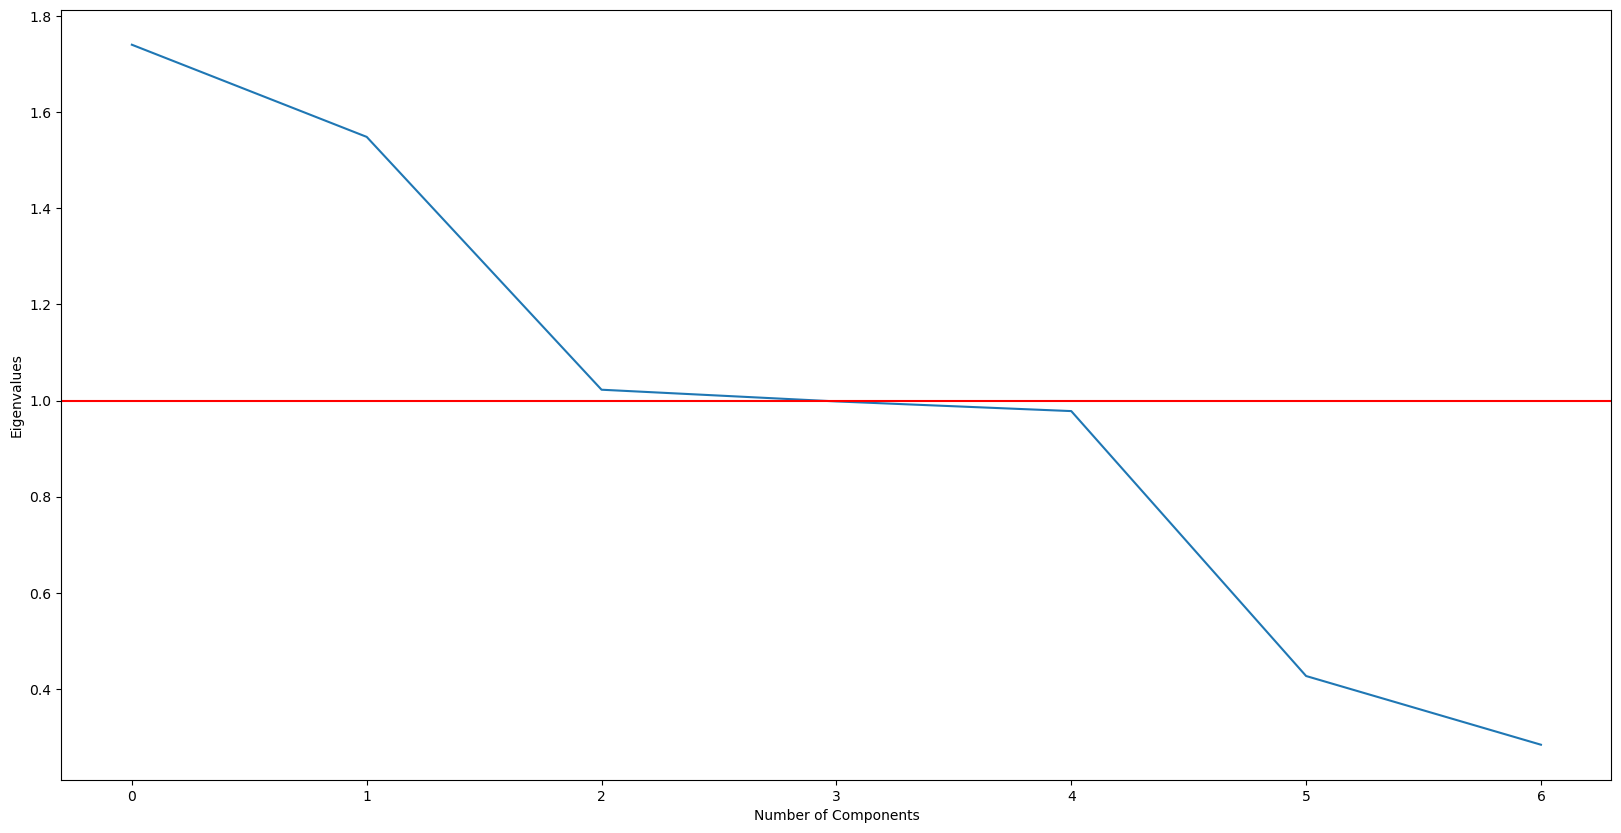

In [67]:
# Calculate the covariance matrix to understand how variables relate to each other
covariance_matrix = np.dot(pca_data_normalized.T, pca_data_normalized) / pca_data.shape[0]

# Compute eigenvalues to see how much information each Principal Component captures
eigenvalues = [np.dot(eigenvector.T, np.dot(covariance_matrix, eigenvector)) for eigenvector in pca_model.components_]

# Visualize the eigenvalues to decide the number of Principal Components to keep
plt.figure(figsize=[20, 10])
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y=1, color='red')  # Reference line to determine significant components
plt.show()
